# Lab Assignment Two: Exploring Image Data
Machine Learning in Python<br/>
Diogo Benetti Faé Rodrigues<br/>
Alex Shockley<br/>
Jay Kynerd<br/>
02/21/2023

**[2 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data.**

## Business Understanding

#### Business Understanding ...

**[.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary.<br/>
[.4 points] Linearize the images to create a table of 1-D image features (each row should be one image).<br/>
[.1 points] Visualize several images.**

## Data Preparation

#### Before we start with some Data Reduction techniques, we must first read and prepare the data so it is ready to be used. The first step is to read the images as numpy arrays. While reading the images, we can also linearize them to become a 1D array, which will improve the algorithms' accuracy.

In [1]:
print()

In [128]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# plt.imshow(dog_array)
# Takes about 12:50 min to run

data = pd.DataFrame(columns=['Target'])
images = []
labels = []
dogs = []
breeds_folders = os.listdir(f'{os.getcwd()}/Images')
print(f"Number of Breeds: {len(breeds_folders)}")

loop_counter = 0
for breed in os.listdir(f'{os.getcwd()}/Images'):
    curr_breed = breed.split('-', 1)[1]
    # Uncomment to see progress
    # print(curr_breed, ' - ', loop_counter)
    for image in os.listdir(f'{os.getcwd()}/Images/{breed}'):
        dog = cv2.imread(f'{os.getcwd()}/Images/{breed}/{image}')
        # Correct color bc cv2 uses BGR color format and matplotlib uses RGB color format
        dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
        dogs.append(dog)
        dog_series = np.ravel(dog)

        images.append(np.array(dog_series))
        labels.append(curr_breed)
    # loop_counter += 1

        # dog_array = np.array(dog)
        # dog_series = np.ravel(dog).tolist()
        # data = pd.concat([data, dog_series], axis=1)
        # data.insert(value=dog_series, column=)
        # data.join(dog_series, ignore_index=True)
        # data.loc[len(data)] = dog_series
        # data = data.append(dog_series, ignore_index=True)
        # data["Target"] = curr_breed
        # break
    # break

dogs = np.array(dogs)
X = np.array(images)
y = np.array(labels)

Number of Breeds: 120


/var/folders/bt/wb3yymln7ddb5524t119715m0000gn/T/ipykernel_26613/3183006334.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dogs = np.array(dogs)
/var/folders/bt/wb3yymln7ddb5524t119715m0000gn/T/ipykernel_26613/3183006334.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(images)


#### Now that we have the images, we can visualize some of them and check the data.

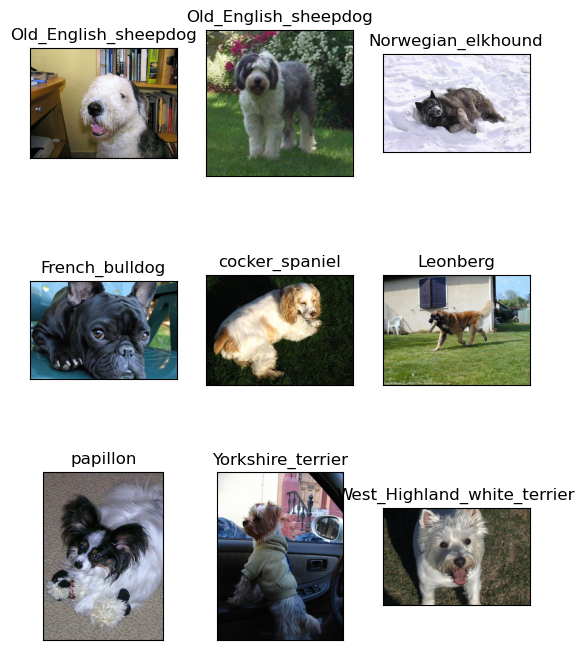

In [129]:
plt.figure(figsize=(1.7 * 3, 2.3 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(3 * 3):
    plt.subplot(3, 3, i + 1)
    rand_idx = np.random.randint(0, 20580)
    plt.imshow(dogs[rand_idx], cmap=plt.cm.gray)
    plt.title(y[rand_idx], size=12)
    plt.xticks(())
    plt.yticks(())

#### Before starting the data reduciton, we must first prepare the images so they are ready to be analyzed. **First step is to convert the images into grayscale because just the shapes and sizes of the dogs should be enough for the algorithms to work. We will not be converting the images into grayscale because the colors of the dogs are an important factor when identifying their breeds.** Then, we will standardize the values to prevent larger values to have greater influence.

In [131]:
from sklearn.preprocessing import StandardScaler

# print(X)
# XX = X.tolist()
# df = pd.DataFrame(X)
# df
scaled = StandardScaler().fit_transform(X)
# dog
# df.head()
scaled

ValueError: setting an array element with a sequence.

**[.5 points] Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.<br/>
[.5 points] Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.<br/>
[2 points]  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?<br/>
[1 points] Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).<br/>
[2 points] Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.**

## Data Reduction

For the data reduction portion of this notebook, we will be using Principal Components Analysis (PCA) to reduce the number of attributes we will use and getting rid of the curse of dimensionality. 

**[1 point] Perform feature extraction upon the images using DAISY. Rather than using matching on the images with the total DAISY vector, you will instead use key point matching. You will need to investigate appropriate methods for key point matching using DAISY. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive.**

## Exceptional Work